# Exemplos de uso

### Processamento de texto: utilizando Keras para classificar dígitos escritos manualmente

A base de dados MNIST, de dígitos escritos manualmente, foi desenvolvida pelos pesquisadores Yann LeCun (Courant Institute, NYU), Corinna Cortes (Google Labs, New York) e Christopher J. C. Burges (Microsoft Research, Redmond), para auxiliar pessoas que têm interesse em aprender técnicas de aprendizado de máquinas e métodos de reconhecimento de padrões em dados reais.

Este conjunto de dados é composto por 70.000 exemplos de dígitos escritos manualmente por pessoas diferentes. Como sugere o site da base de dados, os primeiros 60.000 exemplos serão utilizados para treinamento e os 10.000 restantes para testes.

A biblioteca Keras importa a base de dados MNIST sem necessidade de que você faça o download diretamente no site.

***Importando bibliotecas Keras e massa de dados***

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


***Importando algumas classes que permitem a utilização da rede Feedforward.***

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

***Importando bibliotecas para exibir imagem***

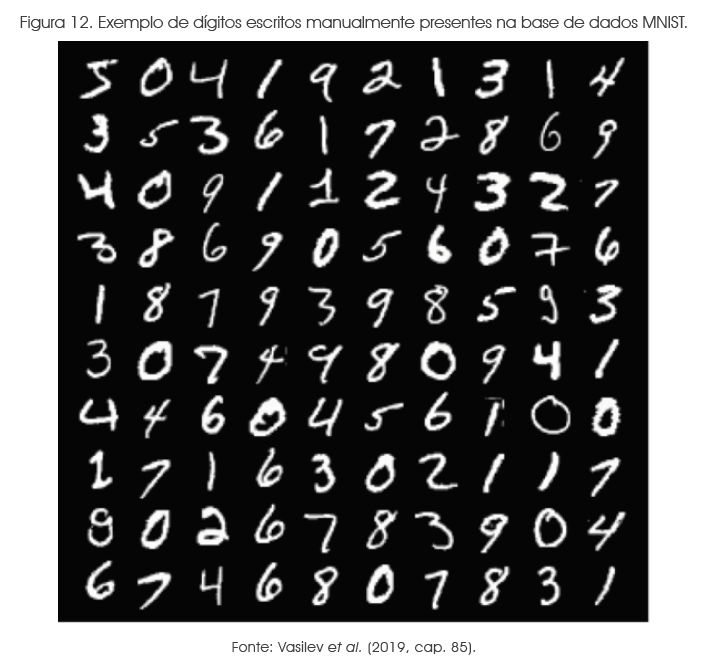

In [3]:
from IPython.display import Image

# Plotando imagem da figura 12
Image("figura12.png")

***Carregando dados de teste e treinamento***

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

É necessário que os dados sejam ajustados a fim de permitir sua utilização. 

X_train contém 60.000 imagens de 28x28 pixels e X_test contém 10.000. 

Para apresentar esses dados à rede, é necessário reorganizá-los individualmente em long arrays de 784 pixels cada, ao invés de matrizes bidimensionais de 28x28 pixels.

***Ajustando os dados de 28x28 pixels individualmente em long arrays de 784 pixels cada ***

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

Os rótulos indicam qual o valor retratado na imagem. 

Vamos transformar o conjunto de rótulos individuais para cada entrada, em um vetor codificado onde todos os elementos são zeros, exceto o elemento que representa o valor da imagem, estes vetores são chamados one-hot-encoded. 

Por exemplo, se a imagem representa o número 4, o vetor seria [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], e assim por diante.

***Definindo a rede para 10 neurônios de possíveis saídas***

In [6]:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

É necessário especificar o tamanho da camada de entrada (input_size), ou seja, o tamanho das imagens MNIST, o número de camadas de neurônios ocultas (hidden_neurons), o número de ciclos para treinamento da rede (epochs) e o tamanho dos pacotes (batch_size).

***Definindo, input size, batch size, hidden neuros, epochs***

In [7]:
input_size = 784
batch_size = 100
hidden_neurons = 100
epochs = 100

Após a realização de todas as etapas acima, é possível definir a rede. 

Vamos utilizar um modelo sequencial, onde cada camada servirá de entrada para a próxima camada. 

Na biblioteca Keras, Dense significa que todas as camadas são totalmente conectadas (fully-connected).

***Definindo 1 camada oculta com função de ativação sigmoid com softmax***

In [8]:
model = Sequential([
    Dense(hidden_neurons, input_dim=input_size),
    Activation('sigmoid'),
    Dense(classes),
    Activation('softmax')
])

A biblioteca Keras permite especificar de forma simples a função de custo (loss function) e sua otimização, através da entropia cruzada (cross-entropy) e do Gradiente Descendente Estocástico (SGD).

***Compilando o modelo com otimização em SGD***

In [9]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

Após especificar a função de custo, já é possível treinar a rede. 

Ao utilizar Keras, é possível realizar o treinamento de uma forma fácil com o método de ajuste

***Treinando o modelo***

In [10]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=epochs, verbose=1)

C:\Users\Oscar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
60000/60000 [==============================] - 22s 361us/step - loss: 0.9619 - accuracy: 0.7628
Epoch 2/100
60000/60000 [==============================] - 17s 278us/step - loss: 0.5014 - accuracy: 0.8789
Epoch 3/100
60000/60000 [==============================] - 21s 347us/step - loss: 0.4056 - accuracy: 0.8968
Epoch 4/100
60000/60000 [==============================] - 18s 303us/step - loss: 0.3561 - accuracy: 0.9064
Epoch 5/100
60000/60000 [==============================] - 23s 389us/step - loss: 0.3215 - accuracy: 0.9156
Epoch 6/100
60000/60000 [==============================] - 20s 328us/step - loss: 0.2986 - accuracy: 0.9208
Epoch 7/100
60000/60000 [==============================] - 16s 273us/step - loss: 0.2814 - accuracy: 0.9246
Epoch 8/100
60000/60000 [==============================] - 18s 298us/step - loss: 0.2671 - accuracy: 0.9274
Epoch 9/100
60000/60000 [==============================] - 18s 304us/step - loss: 0.2517 - accuracy: 0.9321
Epoch 10/100
60000/60000 [==

60000/60000 [==============================] - 23s 378us/step - loss: 0.0893 - accuracy: 0.9755
Epoch 77/100
60000/60000 [==============================] - 19s 318us/step - loss: 0.0866 - accuracy: 0.9769
Epoch 78/100
60000/60000 [==============================] - 20s 337us/step - loss: 0.0855 - accuracy: 0.9776
Epoch 79/100
60000/60000 [==============================] - 23s 387us/step - loss: 0.0857 - accuracy: 0.9772
Epoch 80/100
60000/60000 [==============================] - 22s 362us/step - loss: 0.0889 - accuracy: 0.9759
Epoch 81/100
60000/60000 [==============================] - 18s 295us/step - loss: 0.0835 - accuracy: 0.9784
Epoch 82/100
60000/60000 [==============================] - 22s 360us/step - loss: 0.0846 - accuracy: 0.9764
Epoch 83/100
60000/60000 [==============================] - 23s 380us/step - loss: 0.0851 - accuracy: 0.9769
Epoch 84/100
60000/60000 [==============================] - 22s 374us/step - loss: 0.0846 - accuracy: 0.9772
Epoch 85/100
60000/60000 [======

***Verificando a acurácia dos dados***

Acurácia: indica uma performance geral do modelo.

In [11]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1])

10000/10000 [==============================] - 14s 1ms/step
Test accuracy: 0.9639999866485596


A fim de verificar o que a rede aprendeu, é possível visualizar os pesos das camadas ocultas.

***Verificando os pesos do modelo***

In [12]:
weights = model.layers[0].get_weights()

***Importando bibliotecas de gráficos***

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy


***Plotando resultados***

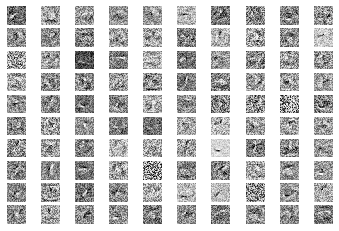

In [14]:
fig = plt.figure()
w = weights[0].T
for neuron in range(hidden_neurons):
    ax = fig.add_subplot(10, 10, neuron + 1)
    ax.axis('off')
    ax.imshow(numpy.reshape(w[neuron], (28, 28)),cmap=cm.Greys_r)
    
plt.savefig('neuron_images.png', dpi=1200)
plt.show()

Notem que os neurônios das camadas ocultas foram agrupadas em uma única imagem para facilitar a visualização. 

É perceptível, ao analisar a figura, que cada neurônio aprendeu uma característica diferente do conjunto de dados apresentado à rede.